In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
import scipy.stats as stats

1. 아래 링크를 이용해 로또(로또6/45) 1회부터 현재 회차까지 로또 복권 1등 당첨 번호를 수집하고, EXCEL로 저장하는 코드를 작성 
    - [https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=로또](https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%A1%9C%EB%98%90)

In [2]:
!pip install selenium

  Using cached trio_websocket-0.11.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached outcome-1.3.0.post0-py2.py3-none-any.whl.metadata (2.6 kB)
  Using cached wsproto-1.2.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.5 MB 1.7 MB/s eta 0:00:06
   - -------------------------------------- 0.5/9.5 MB 7.3 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/9.5 MB 9.7 MB/s eta 0:00:01
   ------- -------------------------------- 1.9/9.5 MB 11.9 MB/s eta 0:00:01
   ------------ --------------------------- 3.0/9.5 MB 15.7 MB/s eta 0:00:01
   ----------------- ---------------------- 4.0/9.5 MB 17.1 MB/s eta 0:00:01
   ---------------------- ----------------- 5.4/9.5 MB 20.3 MB/s eta 0:00:01
   ---------------------------- ----------- 6.6/9.5 MB 21.1 M

12. 수집된 데이터에 별점이 높고 리뷰수가 높은 상위 50개 항목을 확인하시오.

In [39]:
df1 = pd.read_csv(r'C:\Users\UserK\Desktop\Ranee\data\emart_data.csv',  index_col=0)

In [40]:
print(df1.shape)
df1.info()

(1120, 3)
<class 'pandas.core.frame.DataFrame'>
Index: 1120 entries, 0 to 1119
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     1120 non-null   object
 1   상품금액    1120 non-null   int64 
 2   리뷰와별점   1120 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [41]:
df_emart = df1.drop_duplicates()

In [42]:
df_emart.shape

(964, 3)

In [43]:
def score_func(row) :
    return row.split('만점에\n')[1].split('\n상품평')[0]

def review_func(row) :
    a = row.split('개수\n(')[1].split(')')[0]
    return a.replace(',','')
    
df_emart['별점'] = df_emart['리뷰와별점'].apply(score_func).astype(float)
df_emart['리뷰개수'] = df_emart['리뷰와별점'].apply(review_func).astype(int)

C:\Users\UserK\AppData\Local\Temp\ipykernel_13376\1144014411.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\UserK\AppData\Local\Temp\ipykernel_13376\1144014411.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
df_emart['별점'].shape

(964,)

In [45]:
df_emart['리뷰개수'].shape

(964,)

In [46]:
df_emart['리뷰개수'].isnull().sum()

0

In [47]:
df_emart['별점'].unique()

array([4.9, 5. , 4.8, 4.7, 4.5, 4.6, 4. , 4.4, 4.3])

In [48]:
df_emart.sort_values(by=['별점','리뷰개수'],ascending=False)['상품명'].head(50)

1049                                    \n처음에 쌀파스타 - 현미\n
786                                  \n대림 우리쌀모둠어묵탕 311g\n
966                            \n피코크\n치킨너겟 기획 500g+200g\n
1       \n쇼핑의고수\n명품 수제 한우떡갈비 스테이크 선물세트 170g X 8개입 / 고급형\n
949                          \n가격역주행 CJ 비비고 납작교자 405gX2\n
1102             \n마이셰프\n[SSG X 마이셰프] 보리새우 칼국수 전골 1080g\n
2       \n쇼핑의고수\n명품 수제 한우떡갈비 스테이크 선물세트 170g X 10개입 / 프...
874                            \n노브랜드\n피자바 치킨머쉬룸갈릭 100g\n
998                  \n[이달의 미식][오발탄] 얼큰하고 푸짐한 소곱창전골 1kg\n
862                                    \n피코크\n소불고기 718g\n
1119                          \n피코크\n얼큰칼칼한 소곱창전골 1.48kg\n
20                                  \n노브랜드\n크라비 맛살 150g\n
25                          \nCJ제일제당\n삼호 부산어묵 골드 사각300g\n
13                              \n비비고\nCJ 비비고 사골곰탕 500g\n
46                                 \n노브랜드\n한입쏙쏙비엔나 550g\n
371                          \nCJ제일제당\n[비비고]  왕교자490gx2\n
693                                 \n햇반\n햇반 (210g*12입)\n
875           

13. 판매 금액의 Histogram을 시각화 하시오.

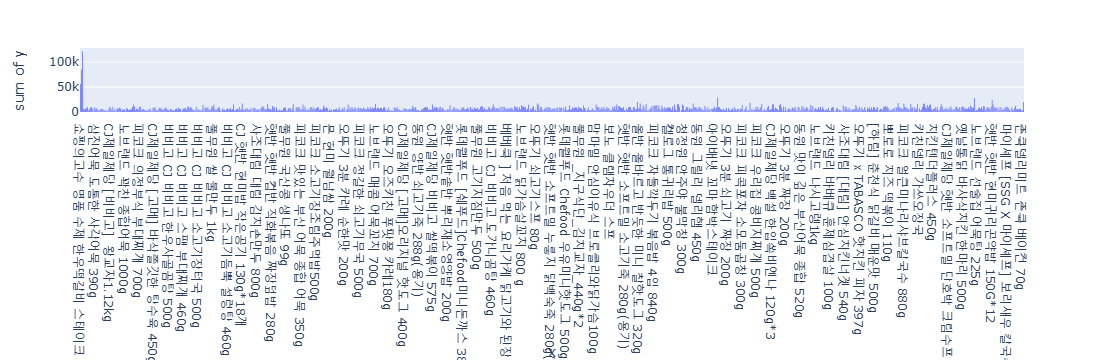

In [51]:
px.histogram(x=df_emart['상품명'],y=df_emart['상품금액'])

14. 판매 금액이 가장 높은 제품과 가장 낮은 제품을 확인하시오.

In [54]:
print(df_emart.sort_values(by='상품금액').head(1))
print(df_emart.sort_values(by='상품금액').tail(1))

                    상품명  상품금액                                      리뷰와별점   별점  \
908  \n키친델리\n치킨무 200g\n   650  \n\n\n상품평점 5점 만점에\n4.6\n상품평 개수\n(490)\n\n  4.6   

     리뷰개수  
908   490  
                                                 상품명    상품금액  \
2  \n쇼핑의고수\n명품 수제 한우떡갈비 스테이크 선물세트 170g X 10개입 / 프...  121600   

                                     리뷰와별점   별점  리뷰개수  
2  \n\n\n상품평점 5점 만점에\n5.0\n상품평 개수\n(3)\n\n  5.0     3  


15. 판매 브랜드를 구분하여, 가장 제품이 많은 판매 브랜드를 확인하시오.
    - 브랜드 명의 경우, 빈도수가 많은 상위 20개 브랜드를 제외한 나머지는 ‘기타’로 분류

In [59]:
def brand_func(row) :
    a = row.replace('\n',' ')
    a = a.split(' ')[1]
    return a
    
df_emart['브랜드'] = df_emart['상품명'].apply(brand_func)

C:\Users\UserK\AppData\Local\Temp\ipykernel_13376\4293715862.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\UserK\AppData\Local\Temp\ipykernel_13376\4293715862.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
df_emart['브랜드'].unique()

array(['쇼핑의고수', 'CJ제일제당', '폰타나', '사조대림', '샘표', '햇반', '풀무원', '비비고', '삼진어묵',
       '삼원가든', '노브랜드', '목우촌', '롯데웰푸드', '하선정', 'CJ', '[진주햄]', '피코크', '동원',
       '대상', '오뗄', '일가집', '존쿡델리미트', '오뚜기', '농심', '[MORN]', '한성', '하림',
       '몬', '청정원', '대림', '키친델리', '보노', '맘마밀', '올반', '해태제과', '베베쿡', '다향오리',
       '아워홈', '마이셰프', '아이배냇', '자연주의', '키친오브인디아', '프레시지', '어메이징', '켈로그',
       '[한아름]', '[오뗄]', '면사랑', '[냉장][패밀리]', '베베곡물친구', '노엘', '티아시아',
       '[동원]', 'S&B', '[이마트가', '닥터오트커', 'SSG푸드마켓', '조선호텔앤리조트', '그루나무',
       '[CJ]미정당', '[Meica]', '일미', '죠스떡볶이', '싱그람', '가격역주행', '[하림]', '남양',
       '도드람', '뽀로로', '한아름', '진주햄', '삼양', '푸디버디', '다향', '만두/도시락/피자外', '죽암',
       '[냉동]', '바로먹쿡', '[이달의', '치킨너겟플러스', '삼양식품', '[농민식품]', '치킨텐더플러스',
       '동원에프앤비', '로얄새우', '헤이밀', '처음에', '시즌드', 'HIPP', '옛날통닭', '사미헌', '삼립',
       '굽네', '강릉초당두부', '캐비아', '베키아에누보', '튼튼한', '[바바김밥]', '[멕시카나]'],
      dtype=object)

In [67]:
brand_list = df_emart['브랜드'].value_counts().head(20).index

In [68]:
brand_list

Index(['피코크', 'CJ제일제당', '노브랜드', '오뚜기', '풀무원', '동원', '햇반', '사조대림', '비비고', '청정원',
       '목우촌', '하림', '샘표', '롯데웰푸드', 'CJ', '삼진어묵', '자연주의', '키친델리', '존쿡델리미트',
       '마이셰프'],
      dtype='object', name='브랜드')

In [70]:
def brand2_func(row) :
    for i in brand_list :
        if i in row :
            return i
    return '기타'

df_emart['브랜드명'] = df_emart['상품명'].apply(brand2_func)

C:\Users\UserK\AppData\Local\Temp\ipykernel_13376\1696828576.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
df_emart['브랜드명'].value_counts()

브랜드명
피코크       154
기타        128
CJ제일제당    117
노브랜드      106
오뚜기        85
풀무원        79
햇반         55
동원         55
사조대림       30
비비고        27
청정원        23
목우촌        16
하림         16
샘표         14
롯데웰푸드      13
삼진어묵        9
키친델리        8
자연주의        8
존쿡델리미트      7
CJ          7
마이셰프        7
Name: count, dtype: int64

16. 판매 브랜드 별 별점의 평균/최대/최소값을 계산하시오.

In [76]:
df_emart.pivot_table(index='브랜드명', values='별점' , aggfunc=['mean','max','min'])

,mean,max,min
,별점,별점,별점
브랜드명,,,
CJ,4.728571,4.8,4.6
CJ제일제당,4.786325,4.9,4.5
기타,4.775781,5.0,4.4
노브랜드,4.766038,5.0,4.3
동원,4.750909,4.9,4.5
롯데웰푸드,4.815385,4.9,4.7
마이셰프,4.742857,5.0,4.6
목우촌,4.825000,4.9,4.7


17. 판매 브랜드 별 리뷰수의 합을 계산하시오.

In [77]:
df_emart.pivot_table(index='브랜드명', values='별점' , aggfunc='sum')

,별점
브랜드명,
CJ,33.1
CJ제일제당,560.0
기타,611.3
노브랜드,505.2
동원,261.3
롯데웰푸드,62.6
마이셰프,33.2
목우촌,77.2
비비고,129.0


18. 28_Machine1.csv 데이터를 df1으로, 28_Machine2.csv 데이터를 df2로 선언하고, df1 데이터를 'Process_Route'와 'Label' 값을 기준으로 데이터를 재구조화 하시오.192. 앞서 재구조화한 데이터와 df2 데이터를 Process_Route를 기준으로 병합하시오.20
3. 병합한 데이터에서 반도체 Wafer의 품질 수준을 나타내는'Label'값을 Y로, 공정에 사용되는 값, C60 / C90 / C160 / C480 / C840 데이터를 X로 선언해 Y를 분류하는 모델을 생성하려 한다. 기존의 머신러닝 모델을 이용해 Y를 분류하는 모델을 생성하시오.
    - 특성 공학기법이 반드시 사용되어야 함
    - 모델의 성능과 변수중요도(또는 회귀 계수)를 확인
    - 생성된 모델을 ML.sav 21 저장
4. 이번엔 앞서 사용한 X와 Y를 이용해, 딥러닝 신경망 모델을 이용하여 학습을 수행하시오.
    - 순전파(Feedforwar)와 역전파(Backpropagation)은 10회 이상 발생하도록 설계
    - Layer는 3층 이상(Input/ Output Layer 제외)
    - 모델 평가 결과 계산
    - 생성된 모델을 22L.h 로 저장
5. 앞서 만든 두개의 모델 (ML.sav 와 DL.h)의 Test Set에서 F1 Score의 23이를 계산하시오.
6. 머신러닝 모델에서 (ML.sav) 변수중요도가 가장 높은 Column의 평균/중앙값/표준편차를 계산하시오. (동일한 값이 나온다면, 임의로 하나의 값만 선택)로 하나의 값만 선택)

In [81]:
df1 = pd.read_csv(r'C:\Users\UserK\Desktop\Ranee\data\ML\28_Machine1.csv',index_col=0)
print(df1.shape)
df1.info()

(90, 89)
<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 89
Data columns (total 89 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Process_Route  90 non-null     object 
 1   Label          90 non-null     object 
 2   IA0103         90 non-null     float64
 3   IA0132         90 non-null     float64
 4   IA1537         90 non-null     float64
 5   IA9129         90 non-null     float64
 6   IA9130         90 non-null     float64
 7   ID0149         90 non-null     float64
 8   ID0285         90 non-null     float64
 9   IJ1590         90 non-null     float64
 10  IJ1643         90 non-null     float64
 11  IJ1644         90 non-null     float64
 12  IJ1684         90 non-null     float64
 13  IJ1741         90 non-null     float64
 14  IJ1978         90 non-null     float64
 15  IJ2036         90 non-null     float64
 16  IJ2065         90 non-null     float64
 17  IJ2766         90 non-null     float64
 18  IJ2772  

In [86]:
df1['Process_Route'].unique()

array(['route_11111', 'route_11133', 'route_11222', 'route_11311',
       'route_11333', 'route_12111', 'route_12133', 'route_12222',
       'route_12311', 'route_12333', 'route_13111', 'route_13133',
       'route_13222', 'route_13311', 'route_13333', 'route_21111',
       'route_21133', 'route_21222', 'route_21311', 'route_21333',
       'route_22111', 'route_22133', 'route_22222', 'route_22311',
       'route_22333', 'route_23111', 'route_23133', 'route_23222',
       'route_23311', 'route_23333', 'route_31111', 'route_31133',
       'route_31222', 'route_31311', 'route_31333', 'route_32111',
       'route_32133', 'route_32222', 'route_32311', 'route_32333',
       'route_33111', 'route_33133', 'route_33222', 'route_33311',
       'route_33333'], dtype=object)

In [85]:
df1.loc[df1['Process_Route'] == 'route_11111']

,Process_Route,Label,IA0103,IA0132,IA1537,IA9129,IA9130,ID0149,ID0285,IJ1590,...,SI0020,SI0106,SI0107,SI0220,SI0235,SI0275,SI0307,SI3053,SI3070,SI3093
0,route_11111,A,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,710.602
1,route_11111,B,0.0,711.6875,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [87]:
df1.loc[df1['Process_Route'] == 'route_11133']

,Process_Route,Label,IA0103,IA0132,IA1537,IA9129,IA9130,ID0149,ID0285,IJ1590,...,SI0020,SI0106,SI0107,SI0220,SI0235,SI0275,SI0307,SI3053,SI3070,SI3093
2,route_11133,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,route_11133,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
df2 = pd.read_csv(r'C:\Uses\UserK\Desktop\Ranee\data\ML\28_Machine2.csv',index_col=0)
print(df2.shape)
df2.info()

(752, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 752 entries, 0 to 751
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Process_Route  752 non-null    object 
 1   C60            752 non-null    float64
 2   C90            752 non-null    float64
 3   C160           752 non-null    float64
 4   C480           752 non-null    float64
 5   C840           752 non-null    float64
 6   Energy         752 non-null    float64
 7   Temp           752 non-null    float64
 8   Process_TF     752 non-null    bool   
 9   ID             752 non-null    object 
dtypes: bool(1), float64(7), object(2)
memory usage: 59.5+ KB


In [88]:
df2.head(5)

,Process_Route,C60,C90,C160,C480,C840,Energy,Temp,Process_TF,ID
0,route_11133,9.997373e+15,1.346079e+17,3.468281e+17,3.002593e+17,6.000007e+17,31574.410,102.847,True,NOLSM111
1,route_11222,9.705928e+15,1.389326e+17,3.838008e+17,3.017903e+17,6.000012e+17,31580.213,104.323,True,NOLSM212
2,route_11311,1.761358e+16,8.782248e+16,6.014497e+17,2.994231e+17,6.000002e+17,32162.414,100.605,False,NOLSM313
3,route_12111,1.148303e+16,9.776566e+16,6.646884e+16,2.991354e+17,6.000003e+17,32874.925,101.739,False,NOLSM414
4,route_12222,9.769204e+15,1.222219e+17,2.496090e+17,3.005576e+17,6.000013e+17,30985.928,106.422,False,NOLSM515
